In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# optional magic command
%matplotlib inline

In [20]:
# load data

iris = load_iris()

In [27]:
# Explore the dataset using .keys()

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [29]:
# Print the shape and type of the 'data'

print(iris['data'].shape)
print(type(iris['data']))

(150, 4)
<class 'numpy.ndarray'>


In [37]:
# Declare two variables that store 'data' and 'feature_names'

D = iris['data']
FN = iris['feature_names']

print(FN)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [113]:
# Create a pandas dataframe with 'data' and use 'feature_names' for the column names

df = pd.DataFrame(data=D, columns=FN)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [116]:
# Get the summary statistics of this dataframe using .describe()

df.describe()
df.iloc[:,0].std()*3.9

3.2294578991136653

In [87]:
# Subset the dataframe to keep only the first 50 rows

df2 = df.iloc[0:50,:]
print(df2)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 5.1               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                5.4               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2

In [155]:
# Check if there are any extreme sepal length values (extreme value criterion: less or greater than 3.9 standard diviations away from the mean)

# Calculate the 3.9 SD +/- range of the data
low = df.iloc[:,0].mean() - (df.iloc[:,0].std() * 3.9)
high = df.iloc[:,0].mean() + (df.iloc[:,0].std() * 3.9)
print(low, high)

# Create a mask for the outliers
mask = np.logical_or(df.iloc[:,0] > high, df.iloc[:,0] < low)
print(mask.shape)

# Mask the data and check the values in the first column that are "outliers"
print(df.iloc[mask.to_numpy().nonzero()[0],0])


2.6138754342196684 9.072791232446999
(150,)
Series([], Name: sepal length (cm), dtype: float64)
[]


In [132]:
not mask.all()
display(mask.to_string())

'0      False\n1      False\n2      False\n3      False\n4      False\n5      False\n6      False\n7      False\n8      False\n9      False\n10     False\n11     False\n12     False\n13     False\n14     False\n15     False\n16     False\n17     False\n18     False\n19     False\n20     False\n21     False\n22     False\n23     False\n24     False\n25     False\n26     False\n27     False\n28     False\n29     False\n30     False\n31     False\n32     False\n33     False\n34     False\n35     False\n36     False\n37     False\n38     False\n39     False\n40     False\n41     False\n42     False\n43     False\n44     False\n45     False\n46     False\n47     False\n48     False\n49     False\n50     False\n51     False\n52     False\n53     False\n54     False\n55     False\n56     False\n57     False\n58     False\n59     False\n60     False\n61     False\n62     False\n63     False\n64     False\n65     False\n66     False\n67     False\n68     False\n69     False\n70     False\n71   

In [156]:
# What about the other three features? Define a function that checks for extreme values for each of the features.

def check_extreme(data, col):
    """
    function that checks for extreme values for each of the features
    
    data: dataset to be used
    col: colume number for the specific features
    
    """
    # Calculate the 3.9 SD +/- range of the data
    low = data.iloc[:,col].mean() - (data.iloc[:,col].std() * 3.9)
    high = data.iloc[:,col].mean() + (data.iloc[:,col].std() * 3.9)
    print(low, high)

    # Create a mask for the outliers
    mask = np.logical_or(data.iloc[:,col] > high, data.iloc[:,col] < low)
    
    # Mask the data and check the values in the first column that are "outliers"
    print(data.iloc[mask.to_numpy().nonzero()[0], col])

check_extreme(df, 1)
check_extreme(df, 2)
check_extreme(df, 3)


1.3574548220802116 4.757211844586456
Series([], Name: sepal width (cm), dtype: float64)
-3.1266631097119197 10.64266310971192
Series([], Name: petal length (cm), dtype: float64)
-1.7733935756120176 4.172060242278684
Series([], Name: petal width (cm), dtype: float64)


<Axes: >

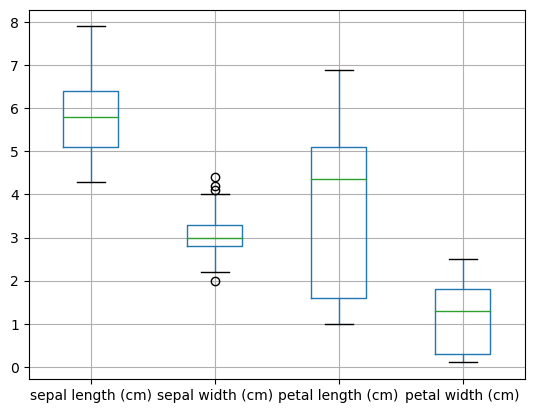

In [167]:
# Check out how to plot boxplots at matplotlib

df.boxplot()

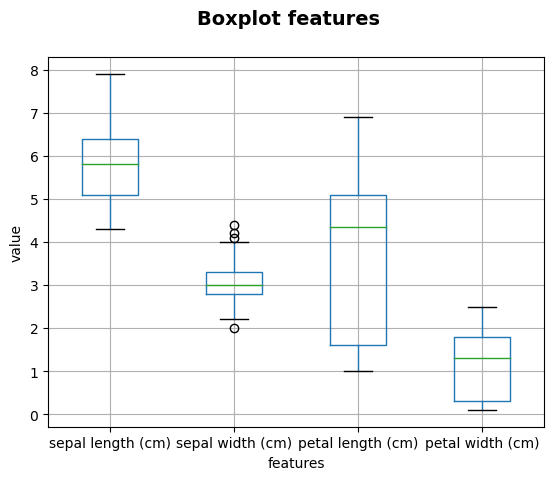

In [174]:
# Boxplot the distribution of the features. Please do add labels for the axes

fig = plt.figure()
fig.suptitle('Boxplot features', fontsize=14, fontweight='bold')

ax = df.boxplot()

ax.set_xlabel('features')
ax.set_ylabel('value')

plt.show()

In [178]:
# Save the dataframe as a csv file and the boxplot as a png file

np.savetxt('iris_df.csv', df)
fig.savefig('iris_df.png')